In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [52]:
from sklearn.preprocessing import LabelEncoder

EDA(Exploratory Data Analysis)

In [7]:
df = pd.read_csv("WHO-COVID-19-global-table-data.csv")

In [8]:
df.head()

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
0,Belarus,Europe,994045.0,10520.0,0.0,NaN,0.0,7118.0,75.0,0.0,NaN,0.0
1,China,Western Pacific,99381302.0,6755.0,47.0,NaN,47.0,122377.0,8.0,0.0,NaN,0.0
2,French Guiana,NaN,98041.0,32825.0,NaN,NaN,NaN,413.0,138.0,NaN,NaN,NaN
3,Latvia,Europe,977765.0,51254.0,0.0,NaN,0.0,7475.0,392.0,0.0,NaN,0.0
4,Saint Vincent and the Grenadines,Americas,9674.0,8720.0,NaN,NaN,NaN,124.0,112.0,NaN,NaN,NaN


In [9]:
df.shape

(241, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 12 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Name                                                          241 non-null    object 
 1   WHO Region                                                    222 non-null    object 
 2   Cases - cumulative total                                      241 non-null    float64
 3   Cases - cumulative total per 100000 population                232 non-null    float64
 4   Cases - newly reported in last 7 days                         79 non-null     float64
 5   Cases - newly reported in last 7 days per 100000 population   33 non-null     float64
 6   Cases - newly reported in last 24 hours                       79 non-null     float64
 7   Deaths - cumulative total                                     241 non-n

In [11]:
df.isnull().sum()

Name                                                              0
WHO Region                                                       19
Cases - cumulative total                                          0
Cases - cumulative total per 100000 population                    9
Cases - newly reported in last 7 days                           162
Cases - newly reported in last 7 days per 100000 population     208
Cases - newly reported in last 24 hours                         162
Deaths - cumulative total                                         0
Deaths - cumulative total per 100000 population                  16
Deaths - newly reported in last 7 days                          161
Deaths - newly reported in last 7 days per 100000 population    241
Deaths - newly reported in last 24 hours                        161
dtype: int64

In [12]:
df.drop(columns = ["Cases - newly reported in last 7 days per 100000 population", "Deaths - newly reported in last 7 days per 100000 population"], inplace = True)

In [13]:
df.columns

Index(['Name', 'WHO Region', 'Cases - cumulative total',
       'Cases - cumulative total per 100000 population',
       'Cases - newly reported in last 7 days',
       'Cases - newly reported in last 24 hours', 'Deaths - cumulative total',
       'Deaths - cumulative total per 100000 population',
       'Deaths - newly reported in last 7 days',
       'Deaths - newly reported in last 24 hours'],
      dtype='object')

In [14]:
df.isnull().sum()

Name                                                 0
WHO Region                                          19
Cases - cumulative total                             0
Cases - cumulative total per 100000 population       9
Cases - newly reported in last 7 days              162
Cases - newly reported in last 24 hours            162
Deaths - cumulative total                            0
Deaths - cumulative total per 100000 population     16
Deaths - newly reported in last 7 days             161
Deaths - newly reported in last 24 hours           161
dtype: int64

In [15]:
df.drop(columns= ['Cases - newly reported in last 24 hours', 'Deaths - newly reported in last 24 hours'], inplace = True)

In [16]:
df.columns

Index(['Name', 'WHO Region', 'Cases - cumulative total',
       'Cases - cumulative total per 100000 population',
       'Cases - newly reported in last 7 days', 'Deaths - cumulative total',
       'Deaths - cumulative total per 100000 population',
       'Deaths - newly reported in last 7 days'],
      dtype='object')

In [17]:
df.isnull().sum()

Name                                                 0
WHO Region                                          19
Cases - cumulative total                             0
Cases - cumulative total per 100000 population       9
Cases - newly reported in last 7 days              162
Deaths - cumulative total                            0
Deaths - cumulative total per 100000 population     16
Deaths - newly reported in last 7 days             161
dtype: int64

In [18]:
df['Cases - newly reported in last 7 days'] = df['Cases - newly reported in last 7 days'].fillna(0)

In [19]:
df['Deaths - newly reported in last 7 days'] = df['Deaths - newly reported in last 7 days'].fillna(0)

In [20]:
df.head()

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days
0,Belarus,Europe,994045.0,10520.0,0.0,7118.0,75.0,0.0
1,China,Western Pacific,99381302.0,6755.0,47.0,122377.0,8.0,0.0
2,French Guiana,NaN,98041.0,32825.0,0.0,413.0,138.0,0.0
3,Latvia,Europe,977765.0,51254.0,0.0,7475.0,392.0,0.0
4,Saint Vincent and the Grenadines,Americas,9674.0,8720.0,0.0,124.0,112.0,0.0


In [21]:
df.isnull().sum()

Name                                                0
WHO Region                                         19
Cases - cumulative total                            0
Cases - cumulative total per 100000 population      9
Cases - newly reported in last 7 days               0
Deaths - cumulative total                           0
Deaths - cumulative total per 100000 population    16
Deaths - newly reported in last 7 days              0
dtype: int64

In [22]:
mode_value = df['WHO Region'].mode()[0]
mode_value

'Europe'

In [23]:
df['WHO Region'] = df['WHO Region'].fillna(mode_value)

In [24]:
df['WHO Region'].head()

0             Europe
1    Western Pacific
2             Europe
3             Europe
4           Americas
Name: WHO Region, dtype: object

In [25]:
df.isnull().sum()

Name                                                0
WHO Region                                          0
Cases - cumulative total                            0
Cases - cumulative total per 100000 population      9
Cases - newly reported in last 7 days               0
Deaths - cumulative total                           0
Deaths - cumulative total per 100000 population    16
Deaths - newly reported in last 7 days              0
dtype: int64

In [26]:
mean_cases = df['Cases - cumulative total per 100000 population'].mean()
mean_cases

41474.06034482759

In [27]:
df['Cases - cumulative total per 100000 population'] = df['Cases - cumulative total per 100000 population'].fillna(mean_cases)

In [28]:
mean_deaths = df['Deaths - cumulative total per 100000 population'].mean()
mean_deaths

262.1066666666667

In [29]:
df['Deaths - cumulative total per 100000 population'] = df['Deaths - cumulative total per 100000 population'].fillna(mean_deaths)

In [30]:
df.isnull().sum()

Name                                               0
WHO Region                                         0
Cases - cumulative total                           0
Cases - cumulative total per 100000 population     0
Cases - newly reported in last 7 days              0
Deaths - cumulative total                          0
Deaths - cumulative total per 100000 population    0
Deaths - newly reported in last 7 days             0
dtype: int64

In [31]:
df.describe()

,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days
count,2.410000e+02,2.410000e+02,241.000000,2.410000e+02,241.000000,241.000000
mean,6.447912e+06,4.147406e+04,391.950207,5.873631e+04,262.106667,4.323651
std,5.109927e+07,3.092087e+05,3641.468277,4.663368e+05,1894.922696,40.431565
min,0.000000e+00,3.900000e+01,0.000000,0.000000e+00,1.000000,0.000000
25%,2.160900e+04,3.011000e+03,0.000000,1.600000e+02,21.000000,0.000000
50%,1.725560e+05,1.540500e+04,0.000000,1.474000e+03,104.000000,0.000000
75%,1.252713e+06,3.729700e+04,0.000000,1.270700e+04,249.000000,0.000000
max,7.769734e+08,4.810991e+06,47230.000000,7.077725e+06,29487.000000,521.000000


Data Visualisation

In [32]:
df['Death Rate %'] = (df['Deaths - cumulative total'] / df['Cases - cumulative total']) * 100

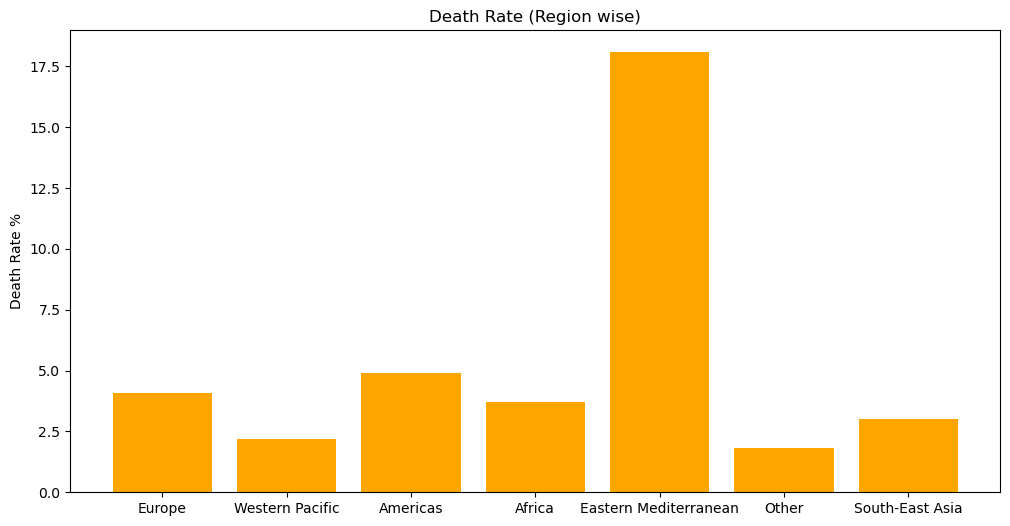

In [33]:
plt.figure(figsize = (12, 6))
plt.bar(df['WHO Region'], df['Death Rate %'], color = 'orange')
plt.ylabel("Death Rate %")
plt.title("Death Rate (Region wise)");

In [34]:
df['Death Rate per 100000'] = (df['Deaths - cumulative total per 100000 population'] / df['Cases - cumulative total per 100000 population']) * 100
df['Death Rate per 100000']

0      0.712928
1      0.118431
2      0.420411
3      0.764818
4      1.284404
         ...   
236    1.291967
237    1.769912
238    1.190476
239    0.631977
240    0.631977
Name: Death Rate per 100000, Length: 241, dtype: float64

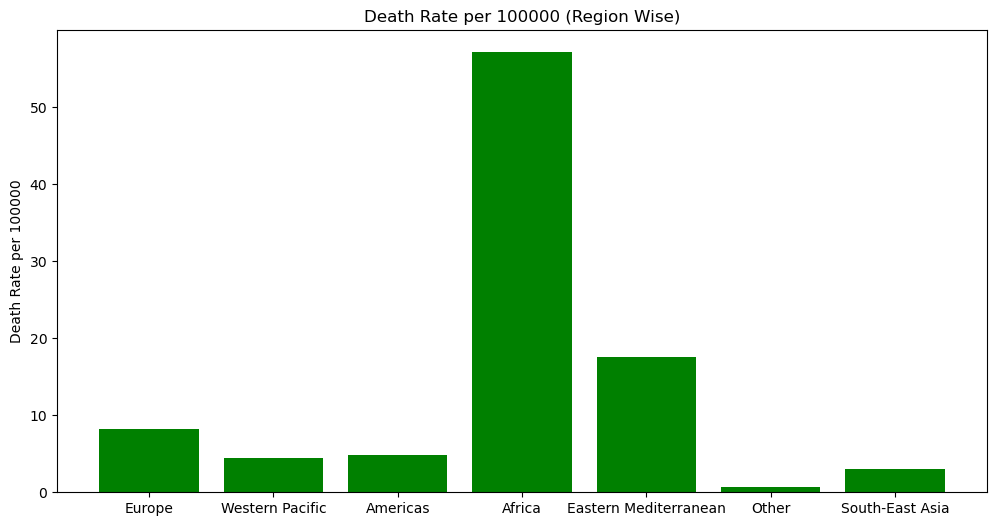

In [35]:
plt.figure(figsize = (12,6))
plt.bar(df['WHO Region'], df['Death Rate per 100000'], color = 'green')
plt.ylabel("Death Rate per 100000")
plt.title("Death Rate per 100000 (Region Wise)");

In [36]:
df['Death Rate (last 7 days)'] = (df['Deaths - newly reported in last 7 days'] / df['Cases - newly reported in last 7 days']) * 100
df['Death Rate (last 7 days)']

0           NaN
1      0.000000
2           NaN
3           NaN
4           NaN
         ...   
236    1.923077
237         NaN
238         NaN
239         NaN
240         NaN
Name: Death Rate (last 7 days), Length: 241, dtype: float64

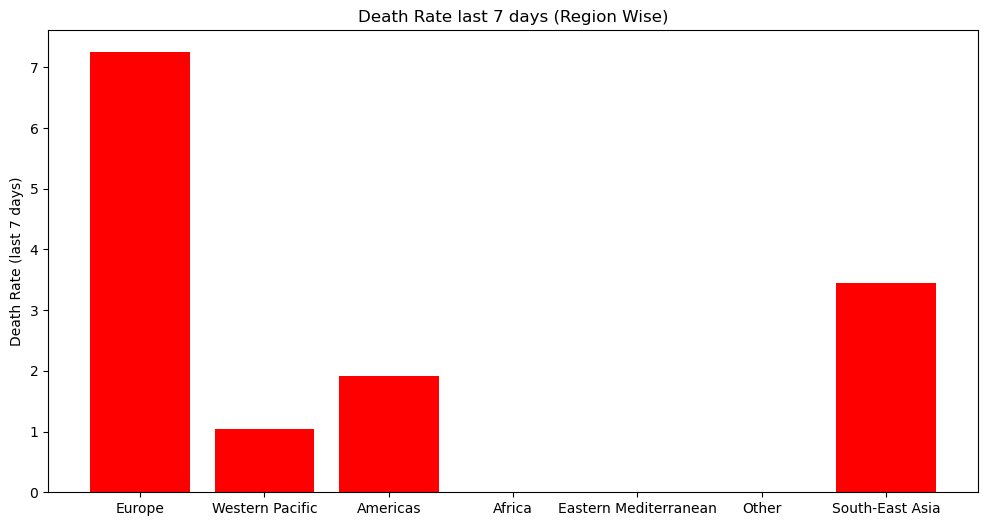

In [37]:
plt.figure(figsize = (12, 6))
plt.bar(df['WHO Region'], df['Death Rate (last 7 days)'], color = 'red')
plt.ylabel("Death Rate (last 7 days)")
plt.title("Death Rate last 7 days (Region Wise)");

<Axes: xlabel='Cases - cumulative total', ylabel='WHO Region'>

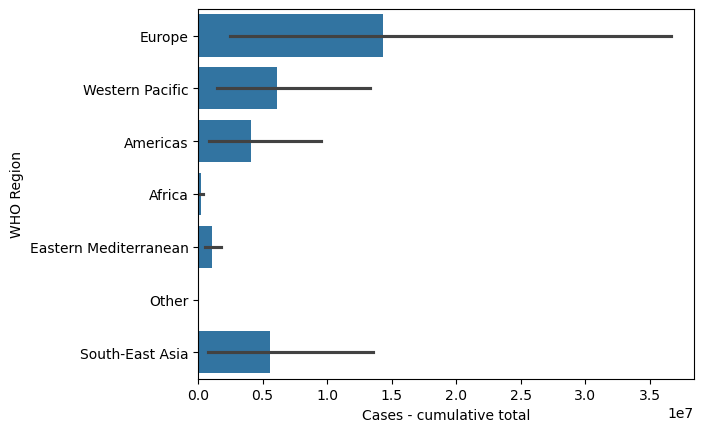

In [42]:
sns.barplot(x = 'Cases - cumulative total', y = 'WHO Region', data = df)

<Axes: xlabel='Deaths - cumulative total', ylabel='WHO Region'>

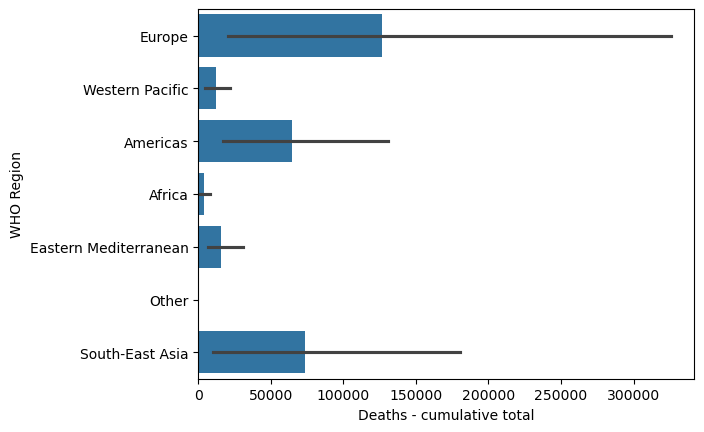

In [43]:
sns.barplot(x = 'Deaths - cumulative total', y = 'WHO Region', data = df)

<Axes: xlabel='Cases - cumulative total per 100000 population', ylabel='WHO Region'>

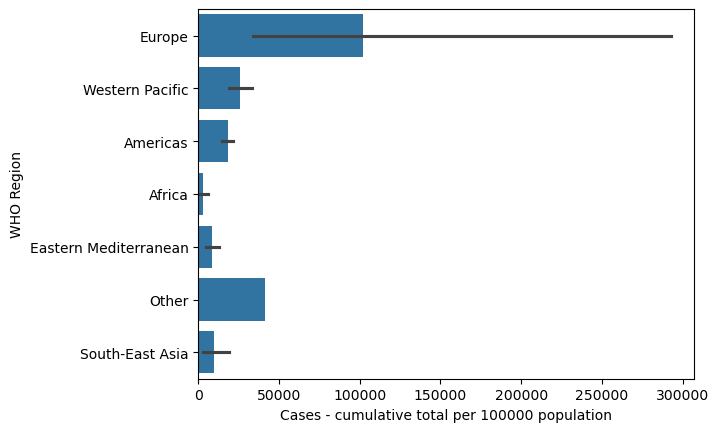

In [46]:
sns.barplot(x = 'Cases - cumulative total per 100000 population', y = 'WHO Region', data = df)

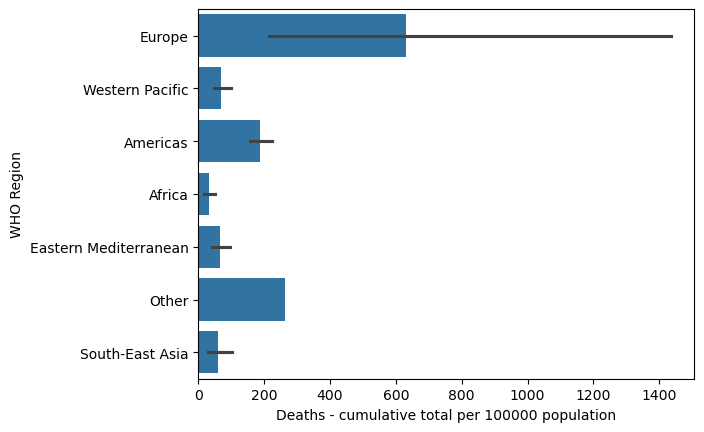

In [47]:
sns.barplot(x = 'Deaths - cumulative total per 100000 population', y = 'WHO Region', data = df);

In [57]:
correlation = df.select_dtypes(include = ['number']).corr()
correlation

,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Death Rate %,Death Rate per 100000,Death Rate (last 7 days)
Cases - cumulative total,1.000000,0.974456,0.828045,0.988200,0.974935,0.878983,-0.024459,-0.024369,0.058286
Cases - cumulative total per 100000 population,0.974456,1.000000,0.830864,0.971398,0.997488,0.826338,-0.039830,-0.030424,0.052180
Cases - newly reported in last 7 days,0.828045,0.830864,1.000000,0.839750,0.833981,0.742528,-0.005554,-0.014816,0.024395
Deaths - cumulative total,0.988200,0.971398,0.839750,1.000000,0.975191,0.900237,0.004286,-0.013106,0.066323
Deaths - cumulative total per 100000 population,0.974935,0.997488,0.833981,0.975191,1.000000,0.830319,-0.014339,-0.010441,0.051214
Deaths - newly reported in last 7 days,0.878983,0.826338,0.742528,0.900237,0.830319,1.000000,-0.011529,-0.017100,0.102810
Death Rate %,-0.024459,-0.039830,-0.005554,0.004286,-0.014339,-0.011529,1.000000,0.323146,-0.128604
Death Rate per 100000,-0.024369,-0.030424,-0.014816,-0.013106,-0.010441,-0.017100,0.323146,1.000000,-0.130867
Death Rate (last 7 days),0.058286,0.052180,0.024395,0.066323,0.051214,0.102810,-0.128604,-0.130867,1.000000


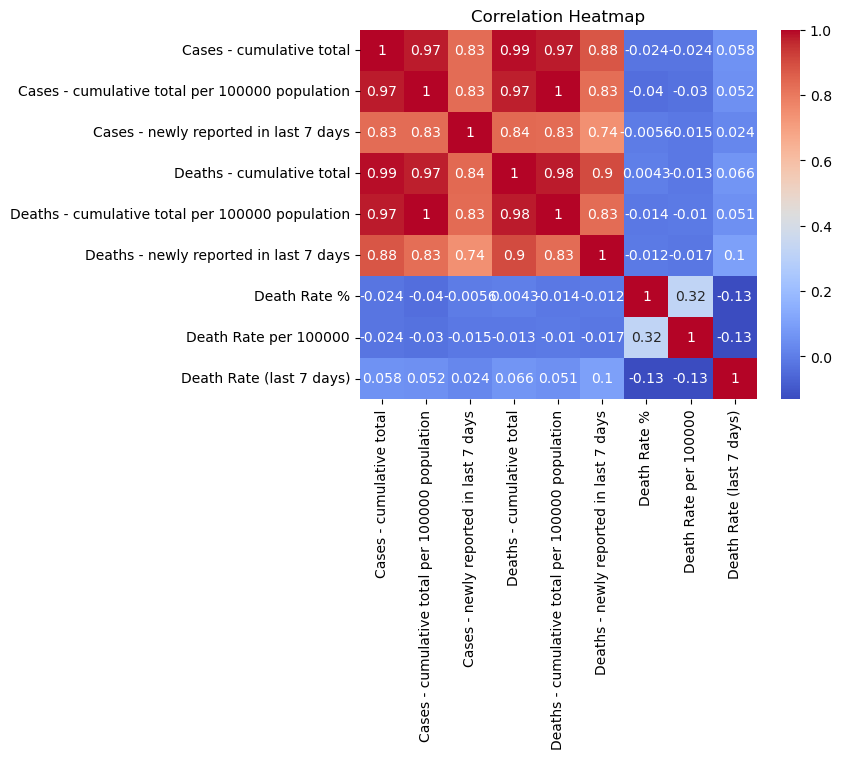

In [60]:
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')
plt.title("Correlation Heatmap")
plt.show();